In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians , sin , cos , sqrt , atan2
import warnings
import folium
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv("C:\\Users\\ac726\\Downloads\\finalTrain.csv")
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    78.116106  12-02-2022       21:55             22:10   
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   
3                    75.829346  13-02-2022       09:20             09:30   
4                    80.502929  14-02-2022       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

In [55]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [56]:
df.shape

(45584, 20)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [58]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         43730.000000             43676.000000         45584.000000   
mean             29.566911                 4.633774            17.017948   
std               5.815064                 0.334744             8.185674   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.500000            12.933284   
50%              30.000000                 4.700000            18.551440   
75%              35.000000                 4.900000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45584.000000                45584.000000   
mean              70.229684                   17.465480   
std               22.885575                    7.335562   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.897963                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  multiple_deliveries  \
count                 45584.000000       45584.000000         44591.000000   
mean                     70.844161           1.023385             0.744635   
std                      21.120578           0.839055             0.572510   
min                       0.010000           0.000000             0.000000   
25%                      73.280000           0.000000             0.000000   
50%                      76.002574           1.000000             1.000000   
75%                      78.107044           2.000000             1.000000   
max                      88.563452           3.000000             3.000000   

       Time_taken (min)  
count      45584.000000  
mean          26.293963  
std            9.384298  
min           10.000000  
25%           19.000000  
50%           26.000000  
75%           32.000000  
max           54.000000

In [59]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [60]:
for col in df.columns:
    print(f"count_unique_values_['{col}'] : {df[col].nunique()}")
    print("-------------------------------------------")
    if df[col].nunique() < 8:
        print(f"unique_values_are : [{df[col].unique()}]")


count_unique_values_['ID'] : 45584
-------------------------------------------
count_unique_values_['Delivery_person_ID'] : 1320
-------------------------------------------
count_unique_values_['Delivery_person_Age'] : 22
-------------------------------------------
count_unique_values_['Delivery_person_Ratings'] : 28
-------------------------------------------
count_unique_values_['Restaurant_latitude'] : 657
-------------------------------------------
count_unique_values_['Restaurant_longitude'] : 518
-------------------------------------------
count_unique_values_['Delivery_location_latitude'] : 4373
-------------------------------------------
count_unique_values_['Delivery_location_longitude'] : 4373
-------------------------------------------
count_unique_values_['Order_Date'] : 44
-------------------------------------------
count_unique_values_['Time_Orderd'] : 176
-------------------------------------------
count_unique_values_['Time_Order_picked'] : 193
-------------------------

In [61]:
columns = [] 
value_counts = [] 
missing_values = [] 
missing_value_percentage = [] 
nunique = [] 
dtypes = []

for col in df.columns:
    columns.append(col)
    value_counts.append(len(df[col]))
    missing_values.append(df[col].isnull().sum())
    missing_value_percentage.append(((df[col].isnull().sum())/(df[col].shape[0]))*100)
    nunique.append(df[col].nunique())
    dtypes.append(df[col].dtypes)


df_ = pd.DataFrame({
    "column_names":columns ,
    "value_counts" :value_counts ,
    "missing_values":missing_values,
    "missing_value_percentage": missing_value_percentage ,
    "nunique" : nunique ,
    "dtypes" : dtypes
})
df_.set_index("column_names")

value_counts  missing_values  \
column_names                                                
ID                                  45584               0   
Delivery_person_ID                  45584               0   
Delivery_person_Age                 45584            1854   
Delivery_person_Ratings             45584            1908   
Restaurant_latitude                 45584               0   
Restaurant_longitude                45584               0   
Delivery_location_latitude          45584               0   
Delivery_location_longitude         45584               0   
Order_Date                          45584               0   
Time_Orderd                         45584            1731   
Time_Order_picked                   45584               0   
Weather_conditions                  45584             616   
Road_traffic_density                45584             601   
Vehicle_condition                   45584               0   
Type_of_order                       45584               0   
Type_of_vehicle                     45584               0   
multiple_deliveries                 45584             993   
Festival                            45584             228   
City                                45584            1200   
Time_taken (min)                    45584               0   

                             missing_value_percentage  nunique   dtypes  
column_names                                                             
ID                                           0.000000    45584   object  
Delivery_person_ID                           0.000000     1320   object  
Delivery_person_Age                          4.067217       22  float64  
Delivery_person_Ratings                      4.185679       28  float64  
Restaurant_latitude                          0.000000      657  float64  
Restaurant_longitude                         0.000000      518  float64  
Delivery_location_latitude                   0.000000     4373  float64  
Delivery_location_longitude                  0.000000     4373  float64  
Order_Date                                   0.000000       44   object  
Time_Orderd                                  3.797385      176   object  
Time_Order_picked                            0.000000      193   object  
Weather_conditions                           1.351351        6   object  
Road_traffic_density                         1.318445        4   object  
Vehicle_condition                            0.000000        4    int64  
Type_of_order                                0.000000        4   object  
Type_of_vehicle                              0.000000        4   object  
multiple_deliveries                          2.178396        4  float64  
Festival                                     0.500176        2   object  
City                                         2.632503        3   object  
Time_taken (min)                             0.000000       45    int64

In [62]:
df.drop("ID" , axis = 1 , inplace =  True)

In [63]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'] , dayfirst=True)

In [64]:
df['Order_Date']

0       2022-02-12
1       2022-02-13
2       2022-03-04
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-03-11
45582   2022-03-07
45583   2022-03-02
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [65]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day

In [66]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Order_Date Time_Orderd Time_Order_picked  ...  \
0                    78.116106 2022-02-12       21:55             22:10  ...   
1                    76.347589 2022-02-13       14:55             15:05  ...   
2                    74.006619 2022-03-04       17:30             17:40  ...   
3                    75.829346 2022-02-13       09:20             09:30  ...   
4                    80.502929 2022-02-14       19:50             20:05  ...   

  Vehicle_condition Type_of_order  Type_of_vehicle multiple_deliveries  \
0                 2         Snack       motorcycle                 3.0   
1                 1          Meal       motorcycle                 1.0   
2                 1        Drinks          scooter                 1.0   
3                 0        Buffet       motorcycle                 0.0   
4                 1         Snack          scooter                 1.0   

  Festival           City Time_taken (min)  year  month  day  
0       No  Metropolitian               46  2022      2   12  
1       No  Metropolitian               23  2022      2   13  
2       No  Metropolitian               21  2022      3    4  
3       No  Metropolitian               20  2022      2   13  
4       No  Metropolitian               41  2022      2   14  

[5 rows x 22 columns]

In [67]:
df.drop("Order_Date" , axis = 1 , inplace = True)

In [68]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [69]:
df.dropna(subset = ["Time_Orderd"] , inplace = True)

In [70]:
df["Time_Orderd"] = df["Time_Orderd"].str.replace("." , ":")

In [71]:
df["Time_Orderd"].sample(10)

40650    0:791666667
45209          13:35
37487          21:45
10690          19:15
5615           11:50
37005          18:10
2749           12:50
25381          12:15
14233    0:458333333
2347           13:10
Name: Time_Orderd, dtype: object

In [72]:
def extract_time(x):
    try:
        return x.split(":")[0] + ":" + x.split(":")[1][:2]
    except IndexError:
        return "00:00"

In [73]:
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [74]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

In [75]:
df["Time_Order_picked"]

0        22:10
1        15:05
2        17:40
3        09:30
4        20:05
         ...  
45579    11:45
45580    20:10
45581    24:05
45582    13:40
45583    17:15
Name: Time_Order_picked, Length: 43853, dtype: object

In [76]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]



# changing the datatype
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')


In [77]:
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':',expand=True)[1]

# changing the datatype
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int32')

In [78]:
df['Delivery_city']=df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [79]:
df.head()

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      DEHRES17DEL01                 36.0                      4.2   
1      KOCRES16DEL01                 21.0                      4.7   
2     PUNERES13DEL03                 23.0                      4.7   
3     LUDHRES15DEL02                 34.0                      4.3   
4      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude Time_Orderd Time_Order_picked  \
0                    78.116106       21:55             22:10   
1                    76.347589       14:55             15:05   
2                    74.006619       17:30             17:40   
3                    75.829346       09:20             09:30   
4                    80.502929       19:50             20:05   

  Weather_conditions  ... multiple_deliveries  Festival           City  \
0                Fog  ...                 3.0        No  Metropolitian   
1             Stormy  ...                 1.0        No  Metropolitian   
2         Sandstorms  ...                 1.0        No  Metropolitian   
3         Sandstorms  ...                 0.0        No  Metropolitian   
4                Fog  ...                 1.0        No  Metropolitian   

  Time_taken (min)  year month day  Time_Order_picked_Hour  \
0               46  2022     2  12                      22   
1               23  2022     2  13                      15   
2               21  2022     3   4                      17   
3               20  2022     2  13                       9   
4               41  2022     2  14                      20   

   Time_Order_picked_min  Delivery_city  
0                     10            DEH  
1                      5            KOC  
2                     40           PUNE  
3                     30           LUDH  
4                      5            KNP  

[5 rows x 24 columns]

In [80]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [81]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'Time_Order_picked_Hour',
       'Time_Order_picked_min', 'Delivery_city'],
      dtype='object')

In [82]:
df['Restaurant_latitude'].dtypes

dtype('float64')

In [83]:
df['Delivery_person_Ratings'].isnull().sum()

np.int64(268)

In [84]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [85]:
df['Delivery_person_Ratings'].isnull().sum()


np.int64(0)

In [86]:
folium.Map(tiles="cartodb positron")


In [97]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,thresh=1 ,subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [88]:
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East



# this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related
# to indian ocean ..

# so that there is much chances that negative sign in lattitude is by mistake

In [89]:
# changing -ve to +ve dataset
"""
abs() function return the absolute value. The absolute
value of any number is always positive it removes the negative sign of a number in Python.
"""
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [90]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [91]:
df['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [92]:
df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [93]:
# droping those lattitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East

In [94]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3509, 25)

In [95]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

Empty DataFrame
Columns: [Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min), year, month, day, Time_Order_picked_Hour, Time_Order_picked_min, Delivery_city, distance]
Index: []

[0 rows x 25 columns]

In [96]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
24      RANCHIRES02DEL01                 32.0                      3.5   
43        AURGRES20DEL03                 25.0                      5.0   
48         VADRES02DEL02                 39.0                      4.2   
50         VADRES04DEL03                 36.0                      4.7   
58         VADRES16DEL02                 23.0                      4.8   
...                  ...                  ...                      ...   
45560      VADRES02DEL01                 26.0                      4.9   
45567   RANCHIRES02DEL02                 34.0                      4.2   
45568      VADRES12DEL03                 25.0                      4.7   
45570      BHPRES19DEL02                 32.0                      4.6   
45580      AGRRES16DEL01                 21.0                      4.6   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
24                     0.0                   0.0                        0.11   
43                     0.0                   0.0                        0.03   
48                     0.0                   0.0                        0.08   
50                     0.0                   0.0                        0.06   
58                     0.0                   0.0                        0.02   
...                    ...                   ...                         ...   
45560                  0.0                   0.0                        0.07   
45567                  0.0                   0.0                        0.13   
45568                  0.0                   0.0                        0.09   
45570                  0.0                   0.0                        0.05   
45580                  0.0                   0.0                        0.07   

       Delivery_location_longitude Time_Orderd Time_Order_picked  \
24                            0.11       21:35             21:45   
43                            0.03       22:10             22:25   
48                            0.08       20:35             20:50   
50                            0.06       20:15             20:20   
58                            0.02       10:40             10:50   
...                            ...         ...               ...   
45560                         0.07       19:35             19:45   
45567                         0.13       17:25             17:30   
45568                         0.09       22:10             22:15   
45570                         0.05       18:10             18:20   
45580                         0.07       19:55             20:10   

      Weather_conditions  ... Festival           City Time_taken (min)  year  \
24                Stormy  ...       No          Urban               35  2022   
43                Cloudy  ...       No  Metropolitian               15  2022   
48                   Fog  ...       No     Semi-Urban               49  2022   
50                Cloudy  ...       No  Metropolitian               30  2022   
58                Stormy  ...       No  Metropolitian               15  2022   
...                  ...  ...      ...            ...              ...   ...   
45560                Fog  ...       No  Metropolitian               32  2022   
45567             Stormy  ...       No          Urban               48  2022   
45568             Cloudy  ...       No  Metropolitian               21  2022   
45570             Stormy  ...       No  Metropolitian               27  2022   
45580              Windy  ...       No  Metropolitian               36  2022   

       month day Time_Order_picked_Hour  Time_Order_picked_min  Delivery_city  \
24         3   8                     21                     45         RANCHI   
43         2  13                     22                     25           AURG   
48         3   2                     20                     50            VAD   
50         3  13                     20               

In [98]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'Time_Order_picked_Hour',
       'Time_Order_picked_min', 'Delivery_city', 'distance'],
      dtype='object')

In [99]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance

Restaurant_latitude  Restaurant_longitude  \
distance                                              
1.465067            30.914057              75.83982   

          Delivery_location_latitude  Delivery_location_longitude  
distance                                                           
1.465067                   30.924057                     75.84982

In [103]:
import folium
from branca.element import Figure

# Initialize the figure and map
fig2 = Figure(width=850, height=550)
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant", icon=folium.Icon(color='purple', prefix='fa', icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Add Tile Layers with proper attribution
folium.TileLayer('Stamen Terrain', attr='&copy; <a href="https://stamen.com/">Stamen Design</a>').add_to(m)
folium.TileLayer('Stamen Toner', attr='&copy; <a href="https://stamen.com/">Stamen Design</a>').add_to(m)
folium.TileLayer('Stamen Water Color', attr='&copy; <a href="https://stamen.com/">Stamen Design</a>').add_to(m)
folium.TileLayer('cartodbpositron', attr='&copy; <a href="https://carto.com/attributions/">CartoDB</a>').add_to(m)
folium.TileLayer('cartodbdark_matter', attr='&copy; <a href="https://carto.com/attributions/">CartoDB</a>').add_to(m)

# Add a layer control to switch between tile layers
folium.LayerControl().add_to(m)

# Add the map to the figure
fig2.add_child(m)

# Display the map
m


In [104]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

Restaurant_latitude  Restaurant_longitude  \
distance                                               
20.969489            25.443994             81.860187   

           Delivery_location_latitude  Delivery_location_longitude  
distance                                                            
20.969489                   25.583994                    82.000187

In [ ]:
tooltips=f"Distance: {df['distance'].max()} km"

In [108]:
import folium
from branca.element import Figure

# Initialize the figure and map
fig2 = Figure(width=850, height=550)
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant", icon=folium.Icon(color='purple', prefix='fa', icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994, 82.000187]], color='red').add_to(m)

# Add Tile Layers with proper attribution
folium.TileLayer('Stamen Terrain', attr='&copy; <a href="https://stamen.com/">Stamen Design</a>').add_to(m)
folium.TileLayer('Stamen Toner', attr='&copy; <a href="https://stamen.com/">Stamen Design</a>').add_to(m)
folium.TileLayer('Stamen Water Color', attr='&copy; <a href="https://stamen.com/">Stamen Design</a>').add_to(m)
folium.TileLayer('cartodbpositron', attr='&copy; <a href="https://carto.com/attributions/">CartoDB</a>').add_to(m)
folium.TileLayer('cartodbdark_matter', attr='&copy; <a href="https://carto.com/attributions/">CartoDB</a>').add_to(m)

# Add a layer control to switch between tile layers
folium.LayerControl().add_to(m)

# Add the map to the figure
fig2.add_child(m)

# Display the map
m


In [110]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,thresh=2,subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

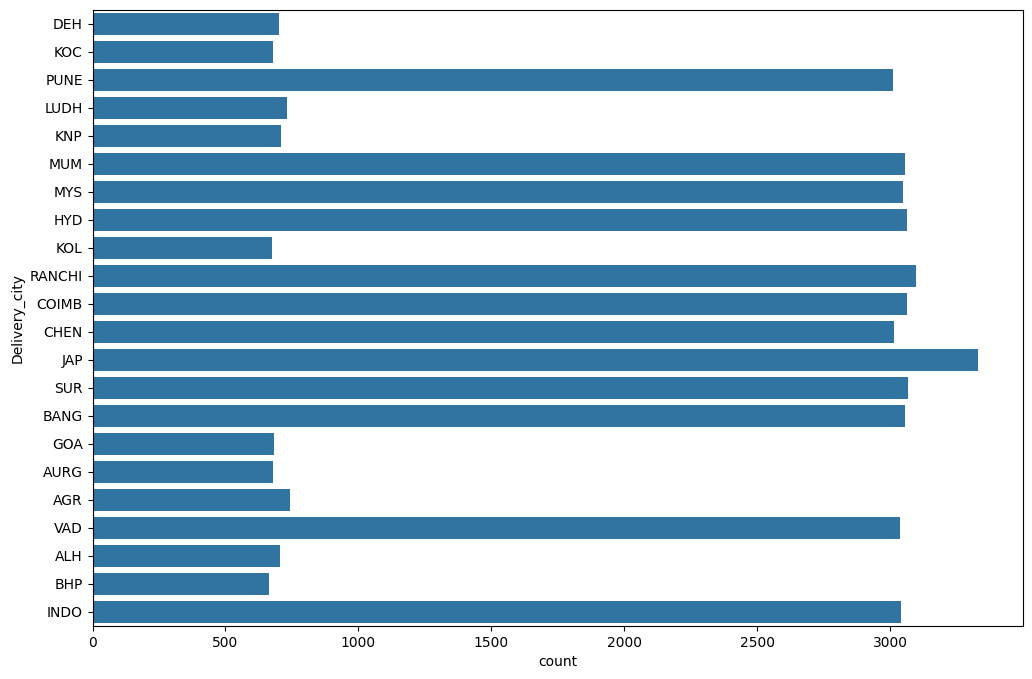

In [112]:
plt.figure(figsize=(12,8))
sns.countplot(df['Delivery_city'])
plt.xticks(rotation='horizontal')
plt.show()

In [113]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'Time_Order_picked_Hour',
       'Time_Order_picked_min', 'Delivery_city', 'distance'],
      dtype='object')

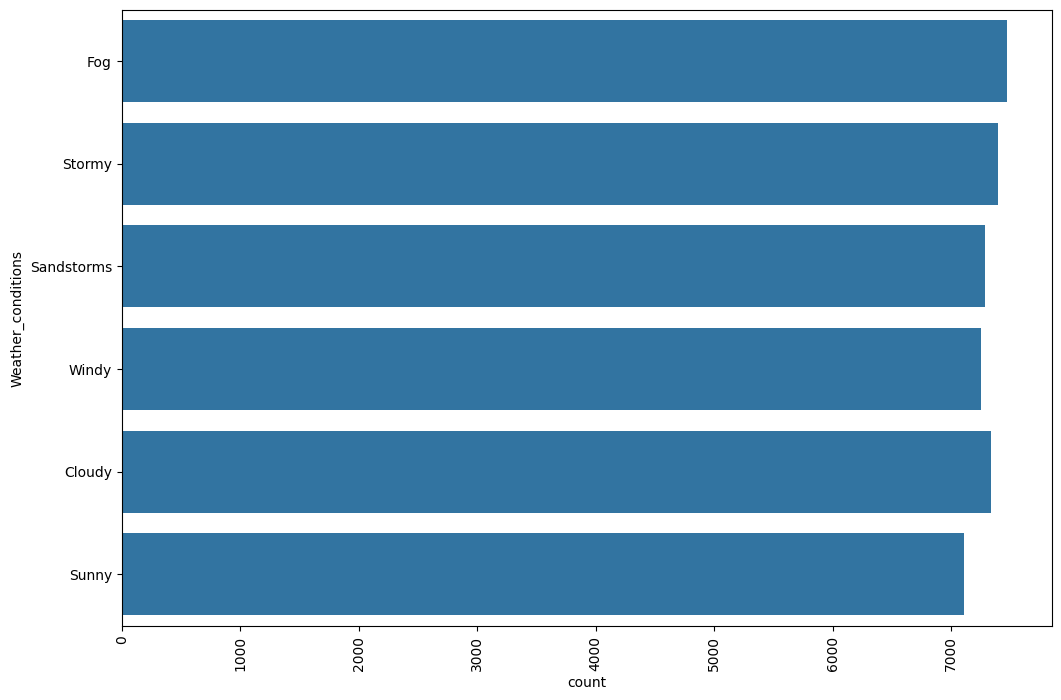

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(df['Weather_conditions'])
plt.xticks(rotation='vertical')
plt.show()

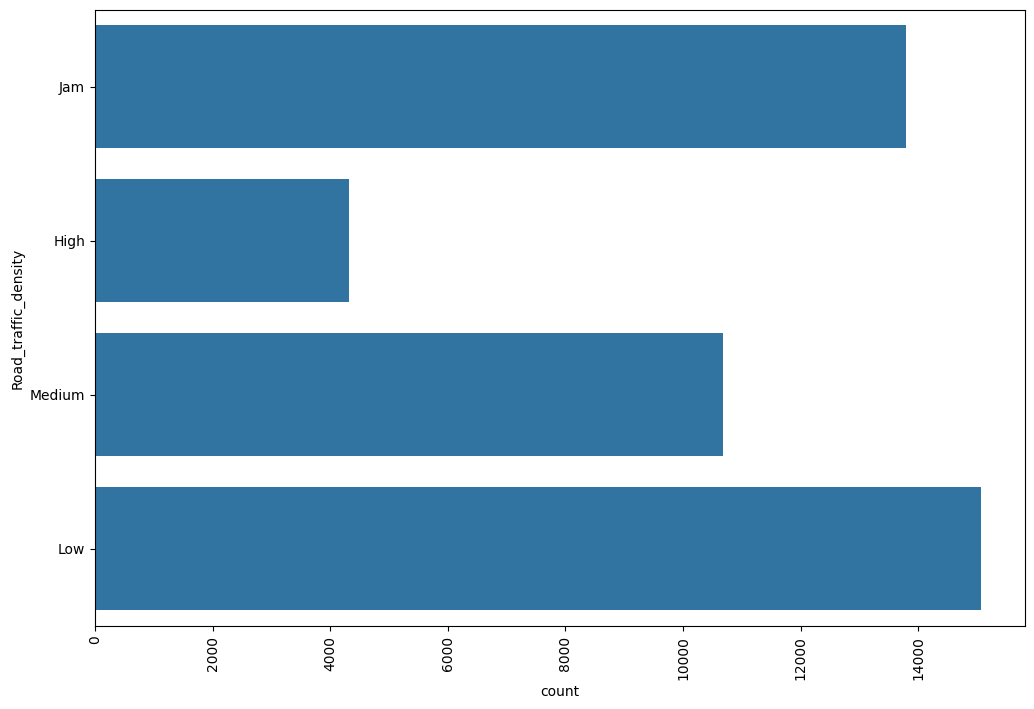

In [115]:
plt.figure(figsize=(12,8))
sns.countplot(df['Road_traffic_density'])
plt.xticks(rotation='vertical')
plt.show()

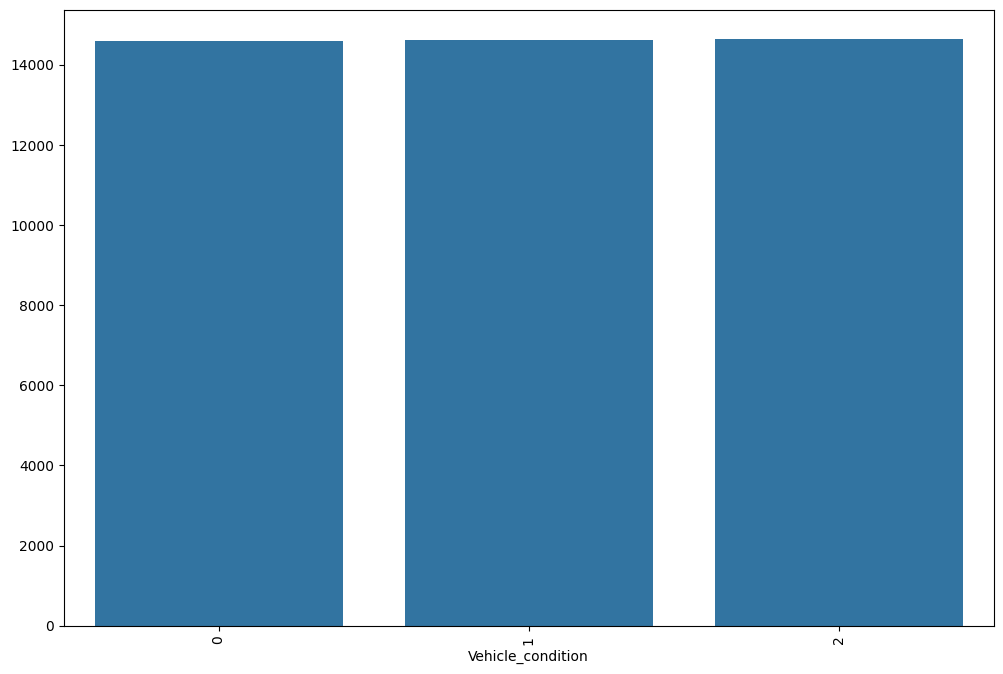

In [117]:
# Precompute the counts of each category in 'Vehicle_condition'
vehicle_condition_counts = df['Vehicle_condition'].value_counts()

# Create the barplot using precomputed counts
plt.figure(figsize=(12, 8))
sns.barplot(x=vehicle_condition_counts.index, y=vehicle_condition_counts.values)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

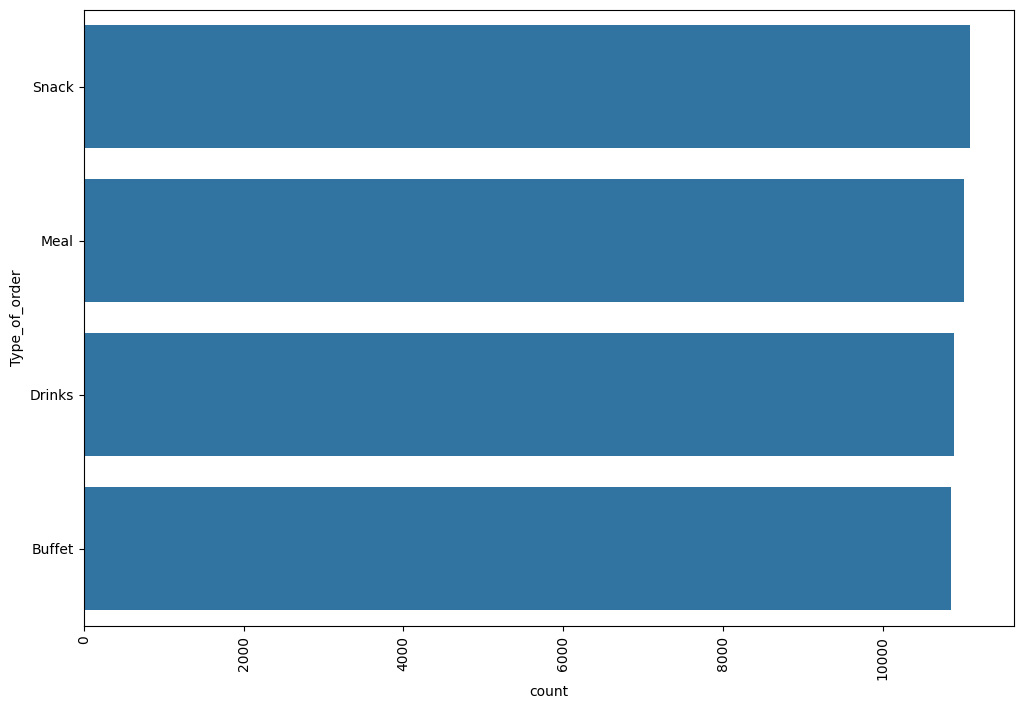

In [118]:
plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_order'])
plt.xticks(rotation='vertical')
plt.show()

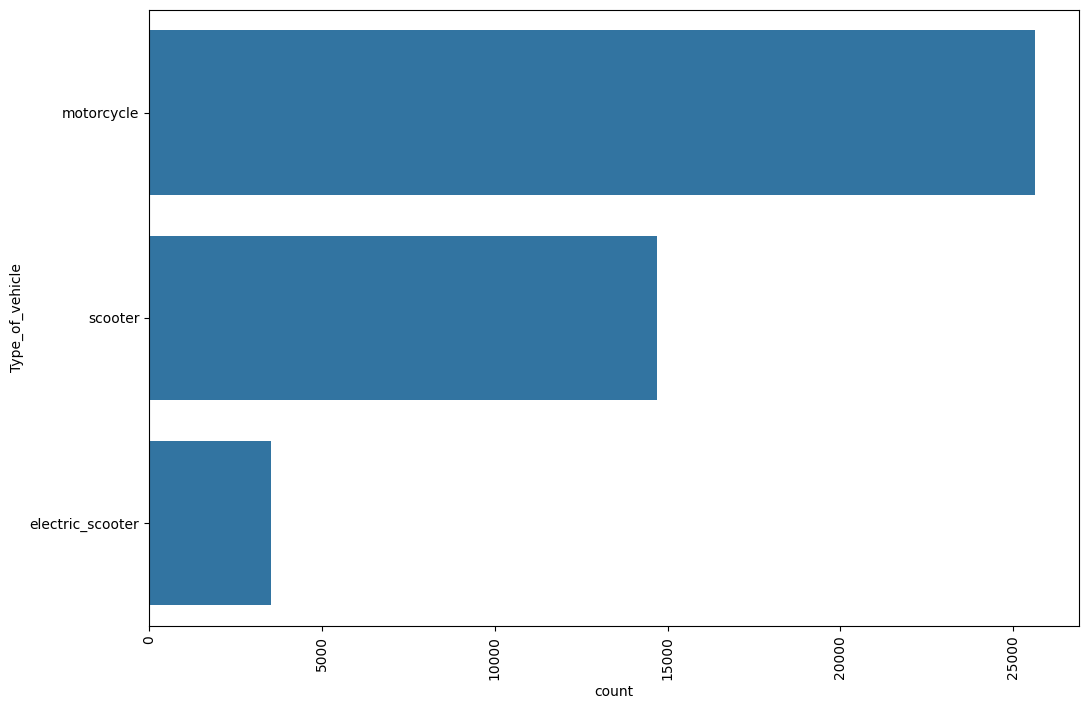

In [119]:
plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_vehicle'])
plt.xticks(rotation='vertical')
plt.show()

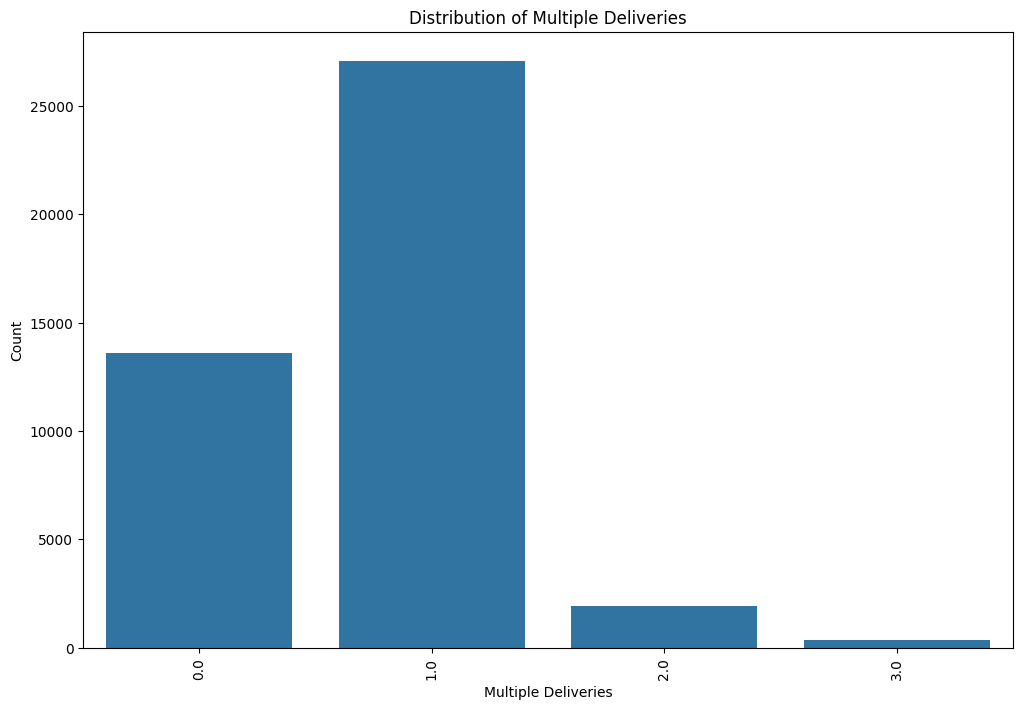

In [122]:
delivery_counts = df['multiple_deliveries'].value_counts()

# Plot using barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.xlabel('Multiple Deliveries')  # Optional: Add x-axis label
plt.ylabel('Count')               # Optional: Add y-axis label
plt.title('Distribution of Multiple Deliveries')  # Optional: Add title
plt.show()

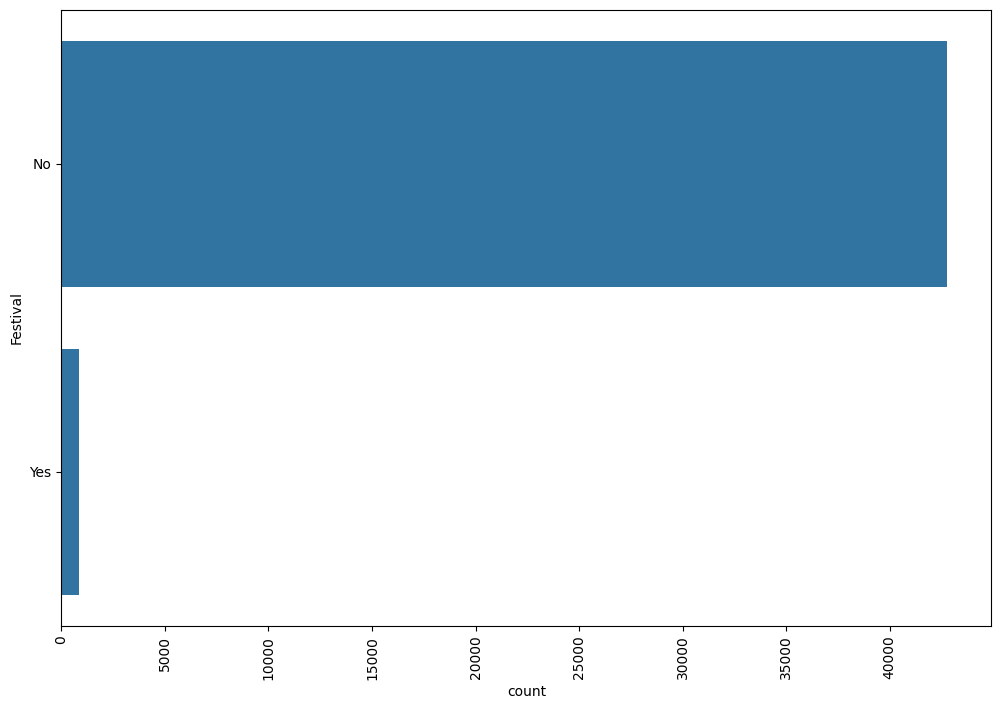

In [123]:
plt.figure(figsize=(12,8))
sns.countplot(df['Festival'])
plt.xticks(rotation='vertical')
plt.show()

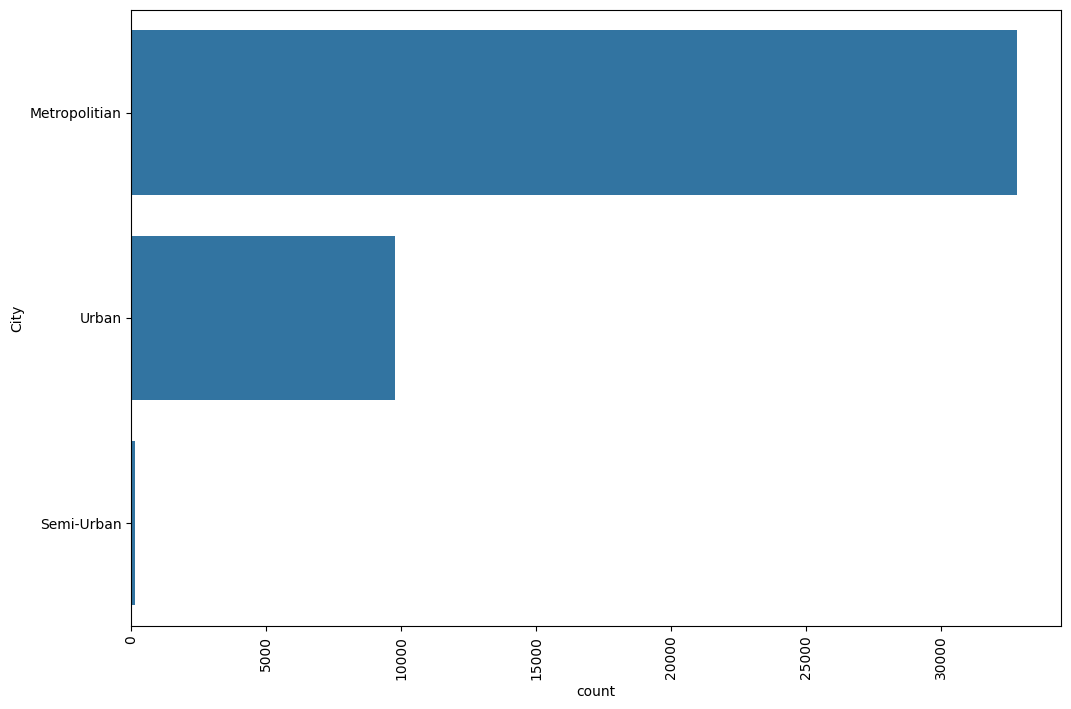

In [124]:
plt.figure(figsize=(12,8))
sns.countplot(df['City'])
plt.xticks(rotation='vertical')
plt.show()

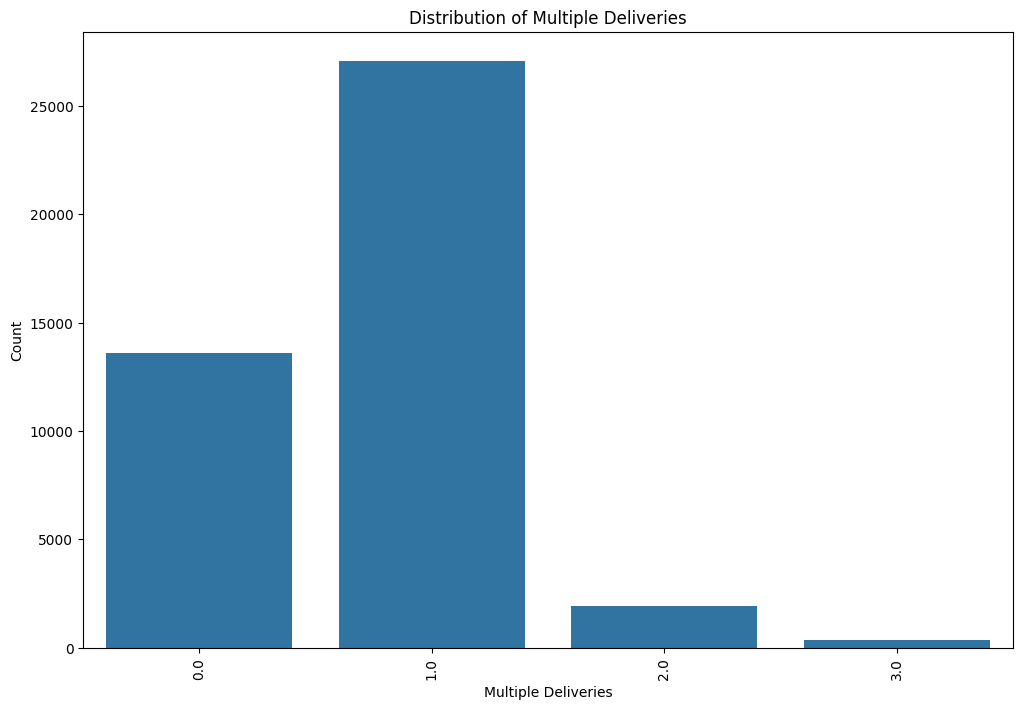

In [126]:
delivery_counts = df['multiple_deliveries'].value_counts()

# Plot using barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.xlabel('Multiple Deliveries')  # Optional: Add x-axis label
plt.ylabel('Count')               # Optional: Add y-axis label
plt.title('Distribution of Multiple Deliveries')  # Optional: Add title
plt.show()

In [131]:
hour_counts = df['TimeOrder_Hour'].value_counts()

# Plot the counts using barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=hour_counts.index, y=hour_counts.values)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Optional: Add axis labels and title
plt.xlabel('Hour of Order')
plt.ylabel('Count')
plt.title('Distribution of Orders by Hour')

plt.show()

KeyError: 'TimeOrder_Hour'

TypeError: agg function failed [how->median,dtype->object]

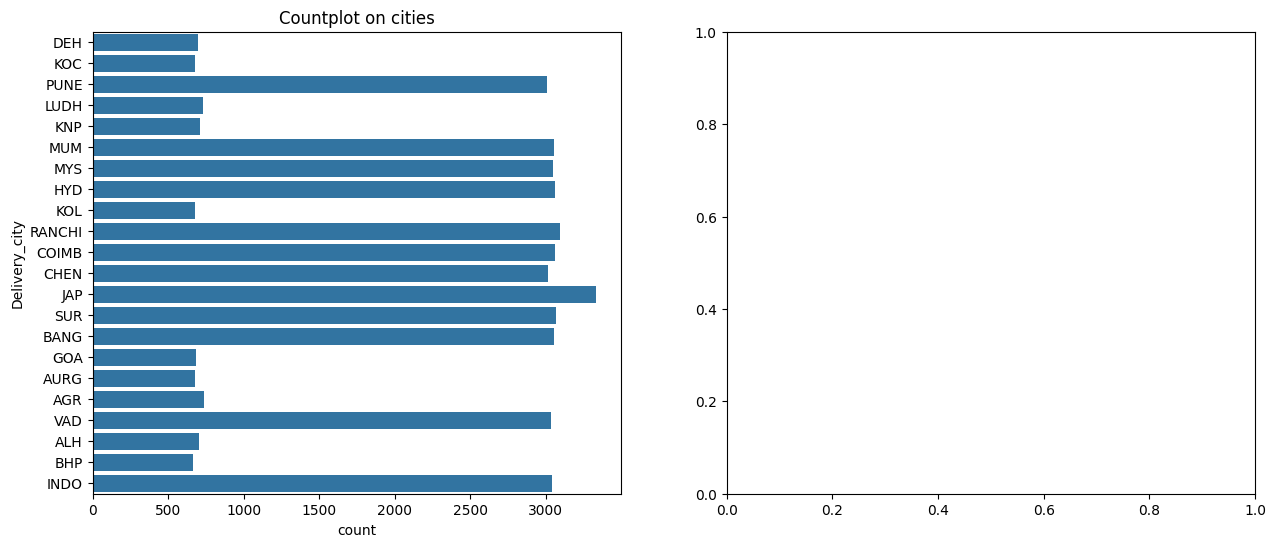

In [132]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Delivery_city'])
plt.title("Countplot on cities")

plt.subplot(1,2,2)
data1 = df.groupby(['Delivery_city']).median().reset_index()
ax = sns.barplot(x='Delivery_city', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Delivery_city with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

TypeError: agg function failed [how->median,dtype->object]

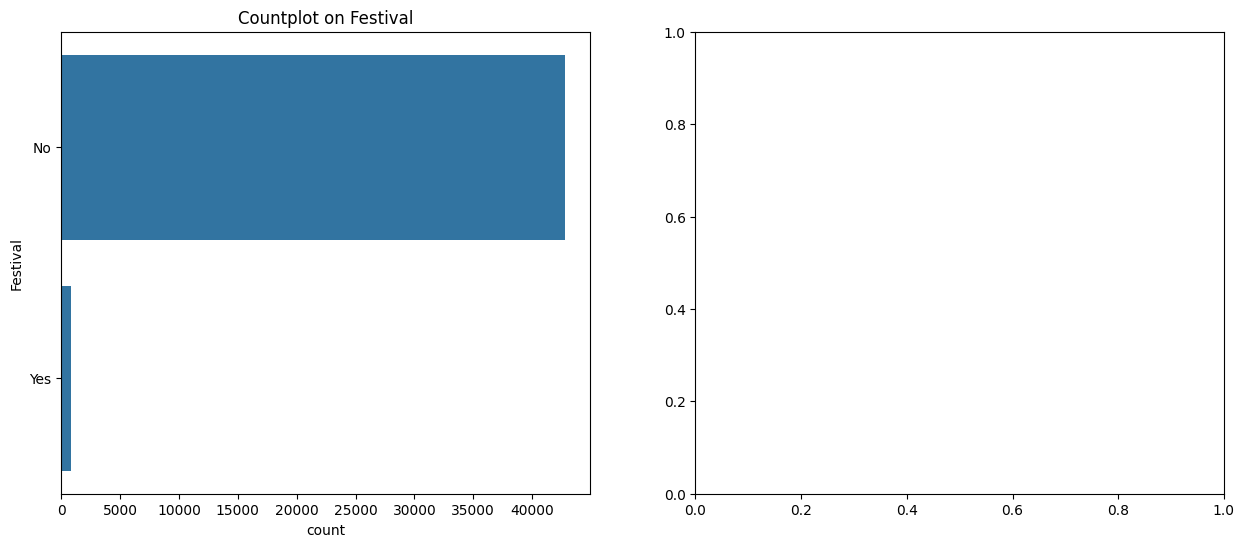

In [133]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Festival'])
plt.title("Countplot on Festival")

plt.subplot(1,2,2)
data1 = df.groupby(['Festival']).median().reset_index()
ax = sns.barplot(x='Festival', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Festival with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

TypeError: agg function failed [how->median,dtype->object]

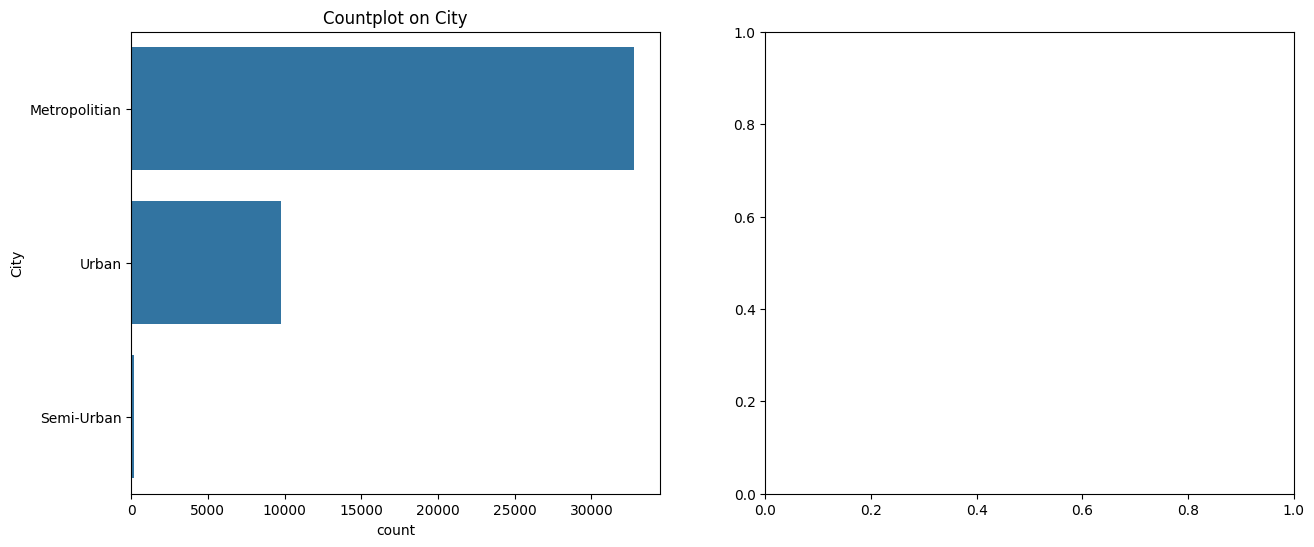

In [134]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = df.groupby(['City']).median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

TypeError: agg function failed [how->median,dtype->object]

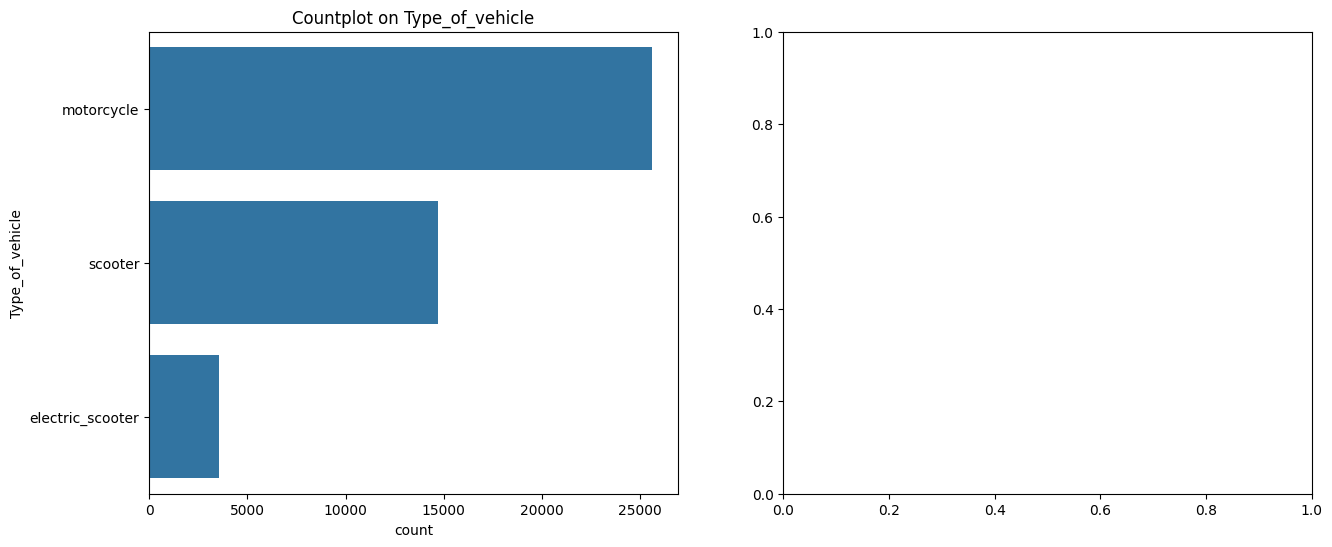

In [135]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Type_of_vehicle'])
plt.title("Countplot on Type_of_vehicle")

plt.subplot(1,2,2)
data1 = df.groupby(['Type_of_vehicle']).median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Type_of_vehicle with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

TypeError: agg function failed [how->median,dtype->object]

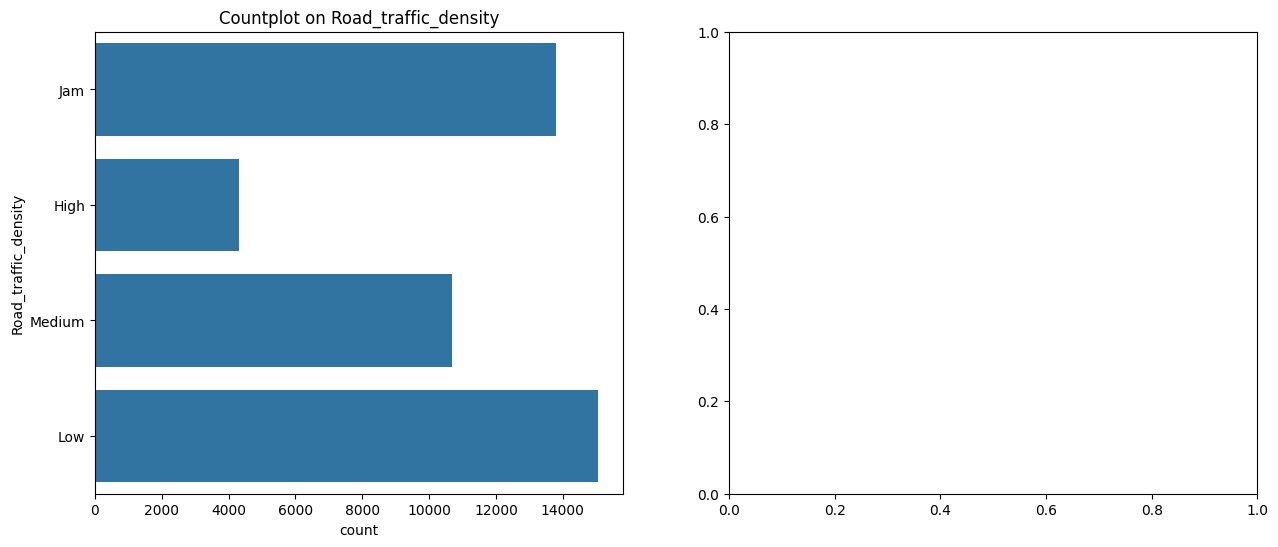

In [136]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = df.groupby(['Road_traffic_density']).median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [137]:
data1 = df.groupby(['Time_taken (min)']).mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]